In [1]:
import json
import funzioni_topic_detection as ftd
import funzioni_preprocessing_text as fpt
import gensim
from gensim.models import TfidfModel
from gensim.models import CoherenceModel

In [30]:
corpus=json.load(open('dataset/allDocuments3.json'))

In [31]:
post,bigram_mdl=fpt.clear_corpus(corpus)

In [44]:
id2word = gensim.corpora.Dictionary(post)

corpus2 = [id2word.doc2bow(doc) for doc in post]
tfidf = TfidfModel(corpus2, id2word=id2word)
tfidfCorpus=[tfidf[bow] for bow in corpus2]

low_value = 0.2
low_value_words = []
for bow in corpus2:
    low_value_words += [id for id, value in tfidf[bow] if value < low_value]
id2word.filter_tokens(low_value_words)
new_corpus2 = [id2word.doc2bow(doc) for doc in post]

In [35]:
i = sum(len(row) == 0 for row in new_corpus2)
print(len(new_corpus2))
print(i)
print(len(new_corpus2)-i)

121
7
114


In [17]:
ldaModelDict={}

In [18]:
coerenza=[]

In [40]:
lsaNostro=ftd.LSAModel(corpus,6)

c:\Users\Francesco\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [43]:
for topic,list in lsaNostro.print_topics().items():
    print(topic,list)

concetto_0 [('abortion', 0.20069204203660657), ('woman', 0.16041030373364437), ('people', 0.1420927909683935), ('state', 0.13982631825179775), ('year', 0.1386684979728929)]
concetto_1 [('abortion', 0.38430484844599544), ('woman', 0.31594572526763465), ('state', 0.19422983393939403), ('decision', 0.15378283339293644), ('supreme_court', 0.11971678386187369)]
concetto_2 [('covid', 0.438997122977878), ('vaccinate', 0.20888336733640098), ('good', 0.17879175402852654), ('high_risk', 0.17195004090524962), ('virus_cause', 0.12980648620511318)]
concetto_3 [('covid', 0.2752726690279104), ('win', 0.16932282869735715), ('vaccinate', 0.1366441898197403), ('recipe', 0.13149823105300137), ('photographer', 0.12138073045345606)]
concetto_4 [('recipe', 0.19420352992443704), ('win', 0.1300255699800624), ('cake', 0.1267479415451357), ('use', 0.1151799832315496), ('mushroom', 0.10881140726846011)]
concetto_5 [('photographer', 0.24402658866752547), ('win', 0.2351646991963985), ('gallery', 0.1383587517748778

In [37]:
lsimodel=gensim.models.lsimodel.LsiModel(new_corpus2, num_topics=6, id2word=id2word)
cm=CoherenceModel(model=lsimodel, texts=post, coherence='c_v')
cm.get_coherence()

c:\Users\Francesco\Anaconda3\lib\site-packages\gensim\topic_coherence\direct_confirmation_measure.py:204: RuntimeWarning: divide by zero encountered in double_scalars
  m_lr_i = np.log(numerator / denominator)
c:\Users\Francesco\Anaconda3\lib\site-packages\gensim\topic_coherence\indirect_confirmation_measure.py:323: RuntimeWarning: invalid value encountered in double_scalars
  return cv1.T.dot(cv2)[0, 0] / (_magnitude(cv1) * _magnitude(cv2))


nan

In [45]:
ldamodel=gensim.models.ldamodel.LdaModel(new_corpus2, num_topics=6, id2word=id2word)
cm=CoherenceModel(model=ldamodel, texts=post, coherence='c_v')
cm.get_coherence()

c:\Users\Francesco\Anaconda3\lib\site-packages\gensim\topic_coherence\direct_confirmation_measure.py:204: RuntimeWarning: divide by zero encountered in double_scalars
  m_lr_i = np.log(numerator / denominator)
c:\Users\Francesco\Anaconda3\lib\site-packages\gensim\topic_coherence\indirect_confirmation_measure.py:323: RuntimeWarning: invalid value encountered in double_scalars
  return cv1.T.dot(cv2)[0, 0] / (_magnitude(cv1) * _magnitude(cv2))


nan

In [38]:
for topic in lsimodel.show_topics():
    print(topic)

(0, '0.549*"hochul" + 0.412*"general_election" + 0.275*"voter" + 0.275*"primary_tuesday" + 0.275*"republicans" + 0.275*"democrats" + 0.275*"williams" + 0.275*"win_democratic" + 0.275*"zeldin" + -0.000*"inbetween"')
(1, '0.556*"lysychansk" + 0.332*"bury" + 0.308*"sievierodonetsk" + 0.278*"veklenko" + 0.278*"trench" + 0.278*"grave" + 0.278*"mass_grave" + 0.278*"estimate_people" + 0.278*"casualty" + 0.062*"funeral"')
(2, '0.655*"firearm" + 0.421*"handgun" + 0.421*"trudeau" + 0.311*"assault_weapon" + 0.280*"buyback_program" + 0.094*"gun_ownership" + 0.094*"proxy" + 0.061*"average" + 0.047*"ownership" + 0.047*"commit"')
(3, '-0.720*"journalist" + -0.288*"independent" + -0.288*"mechanism" + -0.288*"journalism" + -0.288*"sassoli" + -0.288*"democratic_society" + 0.154*"cnn" + 0.116*"zucker" + 0.077*"warnermedia" + 0.077*"memo"')
(4, '-0.576*"cnn" + -0.432*"zucker" + -0.288*"memo" + -0.288*"warnermedia" + -0.288*"company" + -0.288*"relationship" + -0.288*"cuomo" + -0.193*"journalist" + -0.077*"

In [19]:
#ldamodel=gensim.models.ldamodel.LdaModel(new_corpus2, num_topics=7, id2word=id2word,passes=50, iterations=100, eval_every = 10, random_state=20)
for i in range(5,16):
    ldamodel=gensim.models.ldamodel.LdaModel(new_corpus2, num_topics=i, id2word=id2word,passes=50)
    ldaModelDict[i]=ldamodel
    cm=CoherenceModel(model=ldamodel, texts=post, coherence='c_v')
    coerenza.append((i,cm.get_coherence()))
    print(i,cm.get_coherence())

c:\Users\Francesco\Anaconda3\lib\site-packages\gensim\topic_coherence\direct_confirmation_measure.py:204: RuntimeWarning: divide by zero encountered in double_scalars
  m_lr_i = np.log(numerator / denominator)
c:\Users\Francesco\Anaconda3\lib\site-packages\gensim\topic_coherence\indirect_confirmation_measure.py:323: RuntimeWarning: invalid value encountered in double_scalars
  return cv1.T.dot(cv2)[0, 0] / (_magnitude(cv1) * _magnitude(cv2))


5 nan
6 nan
7 nan
8 nan
9 nan
10 nan
11 nan
12 nan
13 nan
14 nan
15 nan


In [22]:
cm=CoherenceModel(model=ldaModelDict[5], texts=post, coherence='c_v')
cm.get_coherence()

c:\Users\Francesco\Anaconda3\lib\site-packages\gensim\topic_coherence\direct_confirmation_measure.py:204: RuntimeWarning: divide by zero encountered in double_scalars
  m_lr_i = np.log(numerator / denominator)
c:\Users\Francesco\Anaconda3\lib\site-packages\gensim\topic_coherence\indirect_confirmation_measure.py:323: RuntimeWarning: invalid value encountered in double_scalars
  return cv1.T.dot(cv2)[0, 0] / (_magnitude(cv1) * _magnitude(cv2))


nan

In [71]:
from matplotlib import pyplot as plt

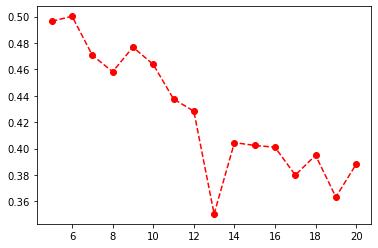

In [76]:
plt.plot([x[0] for x in coerenza],[x[1] for x in coerenza],marker='o',color='r',linestyle='--',label='coerenza')
plt.show()

In [99]:
ldamodel=gensim.models.ldamodel.LdaModel(new_corpus2, num_topics=6, id2word=id2word,passes=100, iterations = 200, random_state=65,minimum_probability=0.1)
cm=CoherenceModel(model=ldamodel, texts=post, coherence='c_v')
print(cm.get_coherence())

0.4926540969912195


In [100]:
for topic in ldamodel.show_topics():
    print(topic)

(0, '0.035*"birria" + 0.021*"tokyo" + 0.021*"barr" + 0.021*"miner" + 0.015*"olympic" + 0.015*"tom" + 0.015*"deadly_shooting" + 0.015*"proxy" + 0.015*"ownership" + 0.015*"gun_ownership"')
(1, '0.023*"roesie" + 0.018*"funeral" + 0.018*"blaze" + 0.018*"northern_california" + 0.018*"greek" + 0.018*"peppermint" + 0.018*"philip" + 0.018*"mccraw" + 0.018*"overrule_roe" + 0.012*"clean"')
(2, '0.027*"journalist" + 0.027*"miah" + 0.022*"dyke" + 0.017*"tornado" + 0.011*"delay" + 0.011*"mechanism" + 0.011*"sassoli" + 0.011*"independent" + 0.011*"democratic_society" + 0.011*"journalism"')
(3, '0.025*"cake" + 0.020*"summer_temperature" + 0.020*"human_coalition" + 0.015*"avocado" + 0.015*"opera" + 0.015*"odesa" + 0.015*"theater" + 0.015*"tea" + 0.015*"obama" + 0.015*"matzo"')
(4, '0.043*"disney" + 0.029*"gay_days" + 0.029*"disney_world" + 0.029*"merkel" + 0.022*"ice" + 0.022*"ghana" + 0.015*"twitter" + 0.015*"democracy" + 0.015*"george_bush" + 0.015*"indoor_air"')
(5, '0.027*"yang" + 0.022*"cnn" + 0.

In [85]:
coerenza[1]

(6, 0.5002188753181677)

In [44]:
topics = ldamodel.print_topics(num_words=10)
for topic in topics:
    print(topic)

(0, '0.026*"miah" + 0.021*"hochul" + 0.016*"northern_california" + 0.016*"blaze" + 0.016*"attack_health" + 0.016*"life_save" + 0.016*"humanitarian" + 0.016*"health_worker" + 0.016*"convention" + 0.016*"general_election"')
(1, '0.024*"avocado" + 0.024*"philip" + 0.024*"tornado" + 0.024*"miner" + 0.024*"holiday" + 0.017*"dressing" + 0.017*"herb" + 0.017*"salad" + 0.017*"caper" + 0.017*"monarchy"')
(2, '0.029*"disney" + 0.024*"journalist" + 0.019*"disney_world" + 0.019*"gay_days" + 0.019*"summer_temperature" + 0.019*"dyke" + 0.019*"roesie" + 0.015*"judge" + 0.015*"peppermint" + 0.015*"obama"')
(3, '0.038*"birria" + 0.024*"odesa" + 0.024*"theater" + 0.024*"opera" + 0.024*"mccraw" + 0.016*"casualty" + 0.016*"trench" + 0.016*"veklenko" + 0.016*"estimate_people" + 0.016*"grave"')
(4, '0.026*"funeral" + 0.026*"cake" + 0.021*"merkel" + 0.021*"human_coalition" + 0.016*"greek" + 0.016*"ice" + 0.016*"tea" + 0.016*"matzo" + 0.011*"tokyo" + 0.011*"numb"')
(5, '0.028*"yang" + 0.023*"cnn" + 0.017*"zuc

In [112]:
lsaModel=ftd.LSAModel(corpus,9)

In [113]:
for topic,val in lsaModel.print_topics().items():
    print(topic,val)

concetto_0 [('abortion', 0.17374447348491195), ('state', 0.14472682790600244), ('people', 0.1330914495588752), ('woman', 0.12685370729557643), ('year', 0.12365213945873108)]
concetto_1 [('abortion', 0.30904657856621326), ('woman', 0.21591812133773575), ('state', 0.19078286912384534), ('supreme_court', 0.15573643144933236), ('decision', 0.13362336725760965)]
concetto_2 [('recipe', 0.16306263300367874), ('student', 0.14797321080413928), ('school', 0.14115596771459793), ('classroom', 0.1295372758120732), ('miah', 0.12287329123192114)]
concetto_3 [('covid', 0.4168989341270857), ('vaccinate', 0.23611424460975422), ('high_risk', 0.19183428784762513), ('people', 0.16649739751920736), ('photographer', 0.15909164532562486)]
concetto_4 [('photographer', 0.2376855582900477), ('recipe', 0.18567040503527082), ('marc_aspland', 0.1708769468720108), ('gallery_app', 0.12668605114844902), ('bradley_ormesher', 0.1123938031720013)]
concetto_5 [('photographer', 0.24974928675217423), ('marc_aspland', 0.1953

In [78]:
post=corpus[1]
lista_token = list(gensim.utils.tokenize(fpt.remove_link_menzione(fel.converti_emoji(post)), lower=True))
lemmatized_string=[wnl.lemmatize(words) for words in fpt.find_and_merge_not(lista_token,ENGLISH_STOP_WORDS)]
post_clear = bigram_mdl[lemmatized_string]
post2 = post_clear
post3 = dictionary.doc2bow(post2)
result = ldamodel10.get_document_topics(post3)
massimo = max(result, key=lambda x: x[1])[0]
print(ldamodel10.print_topic(massimo, topn=10))
print(result)

0.001*"school" + 0.001*"shooting" + 0.001*"insight" + 0.001*"student" + 0.001*"people" + 0.001*"classroom" + 0.001*"use" + 0.001*"tournament" + 0.001*"illinois" + 0.001*"team_game"
[(2, 0.9802472)]


In [114]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

In [163]:
lemmatized_bigram_string=[' '.join(word) for word in post]
vectorizer = TfidfVectorizer()
M=vectorizer.fit_transform(lemmatized_bigram_string)
M=M.toarray()
row,column=M.shape
for i, j in itertools.product(range(row), range(column)):
    if M[i][j]<0.2:
        M[i][j]=0
M=sparse.csr_matrix(M)

termini=vectorizer.get_feature_names()
lsa = TruncatedSVD(n_components=9,n_iter=5000)
lsa.fit(M)
p =   {f"concetto_{str(i)}": list(
            sorted(zip(termini, abs(j)), key=lambda x: x[1],
                   reverse=True)[:5])
        for i, j in enumerate(lsa.components_)}
#concetti=self.print_topics()

In [164]:
for i, j in p.items():
    print(i, j)

concetto_0 [('photographer', 0.4082417479854554), ('marc_aspland', 0.3897306555933293), ('gallery_app', 0.29936131497552304), ('bradley_ormesher', 0.2503573801113368), ('sport', 0.1704445325205576)]
concetto_1 [('final_euro', 0.2944314503068907), ('italy', 0.2763018830118222), ('penalty', 0.24849179898037013), ('game', 0.22873856049387187), ('lose', 0.2116256339306996)]
concetto_2 [('vaccinate', 0.26256365172371227), ('tokyo', 0.24469956829550782), ('team', 0.24397273016854568), ('high_risk', 0.2209704767164458), ('covid', 0.2019549192251259)]
concetto_3 [('vaccinate', 0.28988343894656826), ('high_risk', 0.2563417860414636), ('covid', 0.23952485936222653), ('tokyo', 0.19507340984716315), ('people', 0.1859986260259599)]
concetto_4 [('roll', 0.33955869370936004), ('dough', 0.2623937753927637), ('fresh', 0.2479999556151825), ('classic', 0.21023285314051543), ('warm', 0.17976543752510263)]
concetto_5 [('england', 0.3401710964051735), ('story', 0.1906072648894822), ('authoritative', 0.15950

In [165]:
hdpModel=gensim.models.hdpmodel.HdpModel(new_corpus2, id2word=id2word)

In [166]:
for topic in hdpModel.print_topics():
    print(topic)

(0, '0.018*use_chocolate + 0.015*score + 0.015*trench + 0.013*title + 0.012*odesa + 0.011*swath + 0.010*recirculating + 0.010*holder + 0.010*hamilton + 0.009*exception')
(1, '0.014*ventilation + 0.013*verstappen + 0.012*caper + 0.010*sterling + 0.009*olympics + 0.009*favourite + 0.009*germany + 0.009*pickford + 0.009*birria + 0.008*engage')
(2, '0.018*swimming + 0.017*employee + 0.014*overrule_roe + 0.014*westberg_write + 0.011*simon + 0.011*asher + 0.010*tomato + 0.010*restriction_effect + 0.009*soft + 0.008*pregnant_option')
(3, '0.018*sterling + 0.015*winner + 0.013*dina + 0.012*health_worker + 0.011*general_election + 0.010*prematurely + 0.010*sky + 0.010*console + 0.009*westberg_write + 0.009*global_scale')
(4, '0.016*gay_days + 0.014*cauliflower + 0.013*northern_california + 0.012*swimming + 0.011*olio + 0.011*ventilation + 0.011*shatter + 0.010*pick + 0.010*kane + 0.010*recirculating')
(5, '0.014*democracy + 0.013*longlifeforall + 0.011*crisp + 0.011*ghana + 0.011*husband_queen 

In [66]:
result

[(4, 0.9926481)]

In [70]:
massimo

4

'0.001*"making" + 0.001*"party" + 0.001*"dumpling" + 0.001*"florida" + 0.001*"bagel" + 0.001*"abortion" + 0.001*"recipe" + 0.001*"indoor_air" + 0.001*"air" + 0.001*"s"'

In [72]:
corpus[0]

"The fall of Roe v. Wade has pushed the U.S. into turbulence that feels all too familiar to those who lived through the pre-Roe era. We spoke to women who remember a time without Roe — and the early years after the 1973 ruling.\nCatherine Starr told The New York Times in an interview that she had become pregnant when she was 16, and, without the option of a safe, legal abortion, she gave her baby up for adoption. She was 17 when she attended her first demonstration to push for abortion rights outside City Hall in St. Louis. It was May 24, 1973, just months after the Supreme Court ruled on Roe v. Wade. Starr went to the rally because she “wanted to be able to make sure that the next little girl that gets pregnant has an option,” she said.\nThe same year that Roe was decided, our photographer William E. Sauro documented scenes inside Women's Medical Services (second and fourth photo), an abortion clinic on Walnut Street in downtown Philadelphia, and our photographer Librado Romero took p

In [44]:
corpus[0]

"The fall of Roe v. Wade has pushed the U.S. into turbulence that feels all too familiar to those who lived through the pre-Roe era. We spoke to women who remember a time without Roe — and the early years after the 1973 ruling.\nCatherine Starr told The New York Times in an interview that she had become pregnant when she was 16, and, without the option of a safe, legal abortion, she gave her baby up for adoption. She was 17 when she attended her first demonstration to push for abortion rights outside City Hall in St. Louis. It was May 24, 1973, just months after the Supreme Court ruled on Roe v. Wade. Starr went to the rally because she “wanted to be able to make sure that the next little girl that gets pregnant has an option,” she said.\nThe same year that Roe was decided, our photographer William E. Sauro documented scenes inside Women's Medical Services (second and fourth photo), an abortion clinic on Walnut Street in downtown Philadelphia, and our photographer Librado Romero took p

In [41]:
ldamodel10.print_topics()

[(0,
  '0.001*"roll" + 0.001*"new_york" + 0.001*"roesie" + 0.001*"pickford" + 0.001*"covid" + 0.001*"woman" + 0.001*"holiday" + 0.001*"dough" + 0.001*"birria" + 0.001*"yang"'),
 (1,
  '0.001*"year" + 0.001*"climate_change" + 0.001*"people" + 0.001*"said" + 0.001*"look" + 0.001*"temperature" + 0.001*"pandemic" + 0.001*"s" + 0.001*"heat_wave" + 0.001*"covid"'),
 (2,
  '0.001*"school" + 0.001*"shooting" + 0.001*"insight" + 0.001*"student" + 0.001*"people" + 0.001*"classroom" + 0.001*"use" + 0.001*"tournament" + 0.001*"illinois" + 0.001*"team_game"'),
 (3,
  '0.001*"club" + 0.001*"manchester" + 0.001*"justice" + 0.001*"royal" + 0.001*"s" + 0.001*"journalist" + 0.001*"league" + 0.001*"introducing" + 0.001*"freeze" + 0.001*"win"'),
 (4,
  '0.001*"making" + 0.001*"party" + 0.001*"dumpling" + 0.001*"florida" + 0.001*"bagel" + 0.001*"abortion" + 0.001*"recipe" + 0.001*"indoor_air" + 0.001*"air" + 0.001*"s"')]

In [40]:
print(corpus_tfidf)

[[(0, 1), (1, 2), (2, 2), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 2), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 2), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 2), (48, 1), (49, 1), (50, 1), (51, 2), (52, 3), (53, 1), (54, 1), (55, 2), (56, 1), (57, 1), (58, 1), (59, 1), (60, 3), (61, 2), (62, 1), (63, 1), (64, 1), (65, 2), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 2), (77, 2), (78, 2), (79, 2), (80, 1), (81, 1), (82, 1), (83, 1), (84, 2), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 2)], [(1, 2), (13, 1), (65, 1), (66, 1), (78, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 2), (97, 1), (98, 1), (99, 1), (100, 3), (101, 1), (102, 1), (103, 1), (104, 1), (105, 1), (1

In [11]:
ldamodel2=gensim.models.ldamodel.LdaModel(corpus_tfidf, num_topics=9, id2word=dictionary,\
    passes=30, iterations=100,eval_every = 10, random_state=20)

In [20]:
ldamodel3=gensim.models.ldamodel.LdaModel(corpus_tfidf, num_topics=9, id2word=dictionary,\
    passes=60, iterations=100,eval_every = 10, random_state=20)

In [25]:
ldamodel4=gensim.models.ldamodel.LdaModel(corpus_tfidf, num_topics=9, id2word=dictionary,\
    passes=30, iterations=200,eval_every = 10, random_state=20)

In [28]:
ldamodel5=gensim.models.ldamodel.LdaModel(corpus_tfidf, num_topics=9, id2word=dictionary,\
    passes=30, iterations=200,eval_every = 10)

In [35]:
ldamodel6=gensim.models.ldamodel.LdaModel(corpus_tfidf, num_topics=9, id2word=dictionary,passes=500)

In [36]:
ldamodel6.print_topics()

[(0,
  '0.001*"people" + 0.001*"vaccinated" + 0.001*"analysis" + 0.001*"coal" + 0.001*"supply" + 0.001*"max" + 0.001*"t" + 0.001*"best" + 0.001*"worker" + 0.001*"tea"'),
 (1,
  '0.001*"sport_photographer" + 0.001*"bradley_ormesher" + 0.001*"heat_wave" + 0.001*"league" + 0.001*"prematurely" + 0.001*"covid" + 0.001*"peppermint" + 0.001*"researcher" + 0.001*"catching" + 0.001*"inbetween"'),
 (2,
  '0.002*"justice" + 0.001*"firearm" + 0.001*"roll" + 0.001*"summer_temperature" + 0.001*"bagel" + 0.001*"yang" + 0.001*"people" + 0.001*"city" + 0.001*"test" + 0.001*"pandemic"'),
 (3,
  '0.001*"final_euro" + 0.001*"italy" + 0.001*"illinois" + 0.001*"hand" + 0.001*"disney" + 0.001*"cnn" + 0.001*"ready" + 0.001*"s" + 0.001*"despair" + 0.001*"delight"'),
 (4,
  '0.001*"biden" + 0.001*"woman" + 0.001*"tokyo" + 0.001*"obama" + 0.001*"abortion" + 0.001*"indoor_air" + 0.001*"human_coalition" + 0.001*"texas" + 0.001*"avocado" + 0.001*"moment"'),
 (5,
  '0.001*"roesie" + 0.001*"s" + 0.001*"royal" + 0.001

In [8]:
ldamodel.update(corpus_tfidf)

In [9]:
ldamodel.print_topics()

[(0,
  '0.003*"covid" + 0.002*"vaccinated" + 0.002*"birria" + 0.002*"prematurely" + 0.002*"low" + 0.002*"obama" + 0.002*"catching" + 0.002*"inbetween" + 0.002*"illness" + 0.002*"delivering"'),
 (1,
  '0.003*"abortion" + 0.002*"roll" + 0.002*"illinois" + 0.002*"summer_temperature" + 0.002*"league" + 0.002*"nation" + 0.002*"dumpling" + 0.002*"sweet" + 0.002*"stephen" + 0.002*"peppermint"'),
 (2,
  '0.002*"funeral" + 0.002*"coal" + 0.002*"bagel" + 0.002*"school" + 0.002*"ready" + 0.001*"process" + 0.001*"classroom" + 0.001*"shooting" + 0.001*"police" + 0.001*"ukraine_s"'),
 (3,
  '0.002*"disney" + 0.002*"people" + 0.002*"pandemic" + 0.001*"barr" + 0.001*"gay_day" + 0.001*"dyke" + 0.001*"course" + 0.001*"climate_change" + 0.001*"including_health" + 0.001*"older"'),
 (4,
  '0.002*"astonishing" + 0.002*"date" + 0.002*"indoor_air" + 0.002*"brown" + 0.002*"human_coalition" + 0.002*"air" + 0.001*"birth" + 0.001*"firearm" + 0.001*"new_york" + 0.001*"woman"'),
 (5,
  '0.002*"pasta" + 0.002*"roesi

In [ ]:
num_topics = 5

ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=num_topics, id2word = dictionary, passes=30, iterations=100,
                   chunksize = 10000, eval_every = 10, random_state=20)

In [31]:
ldaModel=ftd.LDAModel(corpus)

In [32]:
ldaModel.print_topics()

[(0,
  '0.001*"race" + 0.001*"firearm" + 0.001*"birria" + 0.001*"ve" + 0.001*"rate"'),
 (1,
  '0.001*"week" + 0.001*"dough" + 0.001*"pandemic" + 0.001*"great" + 0.001*"maria"'),
 (2,
  '0.001*"ash" + 0.001*"report" + 0.001*"follow" + 0.001*"look" + 0.001*"doubt"'),
 (3,
  '0.002*"abortion" + 0.002*"woman" + 0.001*"summer_temperature" + 0.001*"human_coalition" + 0.001*"time"'),
 (4,
  '0.001*"illinois" + 0.001*"yang" + 0.001*"indoor_air" + 0.001*"way" + 0.001*"classroom"'),
 (5,
  '0.001*"pickford" + 0.001*"league" + 0.001*"delivering" + 0.001*"coal" + 0.001*"dumpling"'),
 (6,
  '0.001*"heat_wave" + 0.001*"roll" + 0.001*"bagel" + 0.001*"listen" + 0.001*"introducing"'),
 (7,
  '0.001*"tom" + 0.001*"service" + 0.001*"mask" + 0.001*"north_korean" + 0.001*"ice"'),
 (8,
  '0.002*"roesie" + 0.001*"pasta" + 0.001*"game" + 0.001*"liii" + 0.001*"patriot"'),
 (9,
  '0.001*"report" + 0.001*"journalist" + 0.001*"hand" + 0.001*"party" + 0.001*"europe"')]

In [ ]:
lsaModel=ftd.LSAModel(corpus,9)

In [41]:
hdpModel=ftd.HDPModel(corpus)

In [42]:
hdpModel.print_topics()

[(0,
  '0.002*assisting + 0.002*warming_planet + 0.002*tony + 0.002*essentially + 0.002*unlike + 0.002*french_toast + 0.001*right_abortion + 0.001*attacked + 0.001*policy + 0.001*rotation'),
 (1,
  '0.002*half + 0.002*indication + 0.002*boat + 0.002*consequential + 0.002*tofu + 0.002*hugging + 0.002*adversarial + 0.002*self + 0.002*element + 0.002*classroom'),
 (2,
  '0.003*dimension + 0.002*preparation + 0.002*normalcy + 0.002*duke_edinburgh + 0.002*alice + 0.002*expand + 0.002*spending + 0.001*delightfully + 0.001*washington + 0.001*embargo'),
 (3,
  '0.002*houston + 0.002*decade + 0.002*hotel + 0.002*capital_kyiv + 0.002*receive + 0.002*carried + 0.002*stefanie + 0.001*texture + 0.001*hot + 0.001*neighboring'),
 (4,
  '0.002*temperature_record + 0.002*shelter + 0.002*disparaged + 0.002*peer + 0.002*varicella + 0.002*ghana + 0.002*zelensky + 0.002*earned + 0.002*reopened + 0.002*woman_seeking')]

In [ ]:
lsaModel.print_topics()

In [44]:
ldaModel.print_topics(2)

[(5,
  '0.001*"dumpling" + 0.001*"disney" + 0.001*"abortion" + 0.001*"new_year" + 0.001*"liii" + 0.001*"patriot" + 0.001*"human_coalition" + 0.001*"new_york" + 0.001*"parade" + 0.001*"justice"'),
 (6,
  '0.001*"temperature" + 0.001*"summer_temperature" + 0.001*"birria" + 0.001*"ready" + 0.001*"europe" + 0.001*"hot" + 0.001*"police" + 0.001*"dyke" + 0.001*"mental_health" + 0.001*"fear"')]